# The KaiC Circadian Clock

#### Author(s):  Marek Kwiatkowski, Ian Stark
#### Reference: [Kwiatkowski and Stark (2008)](http://homepages.inf.ed.ac.uk/stark/continuous-pi.pdf) | [Download](https://cpi-catalog.000webhostapp.com/cpi-files/kaiABC.2.cpi)

Circadian clocks are molecular systems that exhibit oscillatory behaviour synchronized with the 24-hour day cycle. This is the model of a primitive circadian clock found in the cyanobacterium Synechococcus elongatus.

## Introduction

Circadian clocks are molecular systems that exhibit oscillatory behaviour synchronized with the 24-hour day cycle. They play an important role in many organisms by helping to regulate their cellular behaviour according to the circadian rhythm. The system we model is a primitive circadian clock found in the cyanobacterium Synechococcus elongatus. It consists of three kinds of protein: KaiA, KaiB and KaiC. In particular, KaiC forms hexamers with 6 phosphorylation sites which are phosphorylated and dephosphorylated in a cyclic manner, thus dictating the circadian rhythm. The KaiC circadian clock has two features that make it of particular interest to the biological community. The first is its simplicity — it requires only 3 kinds of molecules
to function. The other is that it does not rely on either intracellular compartments or gene regulation, which sets it apart from other circadian clocks and (remarkably) makes it possible to reproduce its self-sustaining cycle relatively easily in vitro.

## The allosteric model

Although there are extensive experimental results on the activity of the various components of the KaiC system, its precise mechanism is not yet
understood. In order to explain the observed behaviour, the authors of [8] propose an elegant model based on two assumptions. The first assumption is that every KaiC protein is allosteric, i.e. it can adopt two distinct 3D shapes (conformations), denoted active and inactive. This gives every KaiC hexamer a propensity to spontaneously undergo a phosphorylation-dephosphorylation cycle, as shown in Fig. 6. The cycles of individual KaiC are then synchronized with each other thanks to the other assumption: that the phosphorylating agent KaiA binds more strongly to weakly phosphorylated
KaiC molecules. This mechanism is called differential affinity. The role of KaiB in this model is to stabilise the inactive form of KaiC and to increase the competition for free KaiA molecules between the differently phosphorylated active forms.

In [1]:
%matplotlib notebook

In [2]:
import sys
sys.path.append('..')
from CPiSimulate import singleSimulate

In [7]:
cpi_model = singleSimulate.Simulate('kaiABC.2')

Select the model: kaiABC.2
The processes in this cpi model are:
Kai


## Code

In [5]:
ode_def = cpi_model.view_processdef('Kai')

The cpi definitions of selected file are:

-- The species:



-- First, KaiA and KaiB. They can be bound and receive a name.

-- When triggered on it, they return to their original unbound state.



species A(a)

	= a(x).x.A(a);



species B(b)

	= b(x).x.B(b);





-- Now, the 7 active forms of KaiC. All of them (ex. boundary

-- conditions) can either flip to the inactive side, autonomously 

-- phosphorylate to the next form in the active chain, or bind KaiA.

-- When bound to KaiA, they can either go to the next form or unbind.



species C0(a0,a1,a2,a3,a4,a5,b0,b1,b2,b3,b4,b5,b6,bb0,bb1,bb2,bb3,bb4,bb5,bb6,aa0,aa1,aa2,aa3,aa4,aa5,aa6,aaa0,aaa1,aaa2,aaa3,aaa4,aaa5,aaa6)

	= {act-r@1.0, act-u@10}

	  tau<1e-5>.CC0(a0,a1,a2,a3,a4,a5,b0,b1,b2,b3,b4,b5,b6,bb0,bb1,bb2,bb3,bb4,bb5,bb6,aa0,aa1,aa2,aa3,aa4,aa5,aa6,aaa0,aaa1,aaa2,aaa3,aaa4,aaa5,aaa6)

	  + tau<2.5e-2>.C1(a0,a1,a2,a3,a4,a5,b0,b1,b2,b3,b4,b5,b6,bb0,bb1,bb2,bb3,bb4,bb5,bb6,aa0,aa1,aa2,aa3,aa4,aa5,aa6,aaa0,aaa1,aaa2,aaa3,aaa4,a

## Plot

Time Start: 0.0, Time End: 100.0.
Input number of times: 0. You can only use GLIMDA solver to simulate this process.
Final Run Statistics: Simulate kaiABC.2 process Kai 

 Number of steps                           : 1279
 Number of function evaluations            : 6908
 Number of Jacobian evaluations            : 2329
 Number of error test failures             : 5
 Number of LU decompositions               : 2329
 Number of nonlinear convergence failures  : 43

Solver options:

 Solver                  : GLIMDA (implicit)
 Tolerances (absolute)   : 1e-06
 Tolerances (relative)   : 1e-06

Simulation interval    : 0.0 - 100.0 seconds.
Elapsed simulation time: 293.83 seconds.


<IPython.core.display.Javascript object>


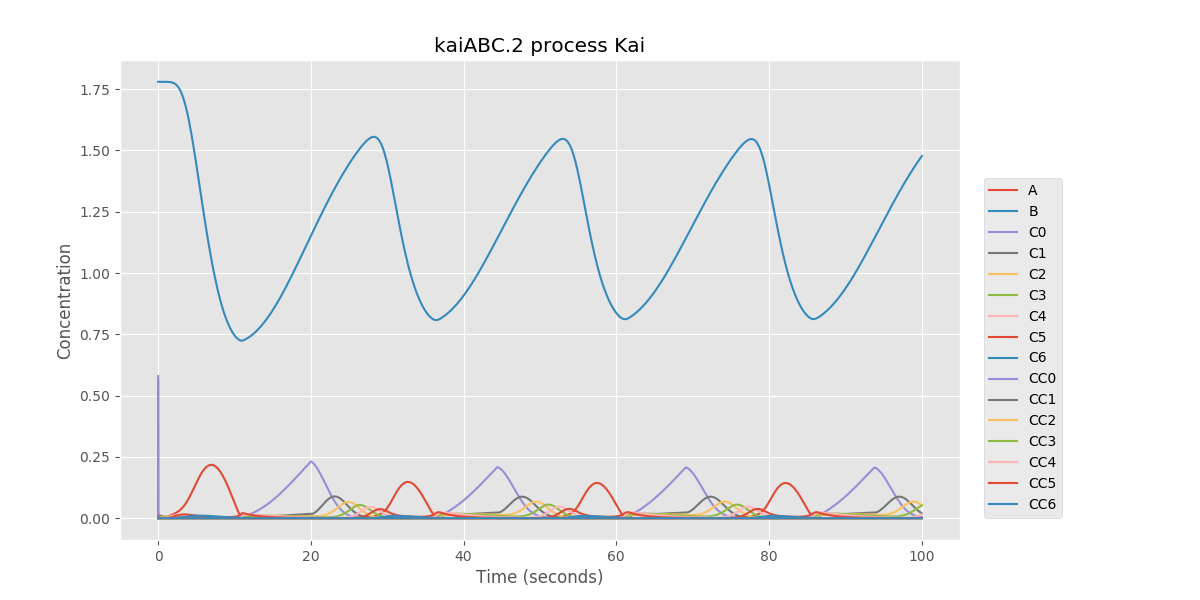

Picture will not be saved or you can change your selection.


In [9]:
solution = cpi_model.simulate_process('Kai','GLIMDA', 0, 100, 0)
solution.show_plot()